In [1]:
!pip install -U transformers

Model page: https://huggingface.co/Falconsai/nsfw_image_detection

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/Falconsai/nsfw_image_detection)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

# 1) google/vit-base-patch16-224 Model

In [11]:
#-----------------------

In [12]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch
import requests

# Load an image from the web (or you can load your own)
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Load the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Run inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get prediction
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Predicted class: Egyptian cat


In [16]:

# Load the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [17]:
def image_recog(url):
  #url = "http://images.cocodataset.org/val2017/000000039769.jpg"
  print("url = " + str(url))
  image = Image.open(requests.get(url, stream=True).raw)

  # Preprocess the image
  inputs = feature_extractor(images=image, return_tensors="pt")

  # Run inference
  with torch.no_grad():
      outputs = model(**inputs)
      logits = outputs.logits

  # Get prediction
  predicted_class_idx = logits.argmax(-1).item()
  print("Predicted class:", model.config.id2label[predicted_class_idx])

In [20]:
url_car = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg/960px-2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg"

image_recog(url_car)

url = https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg/960px-2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg
Predicted class: car wheel


In [21]:
url_mac = "https://cdn.thewirecutter.com/wp-content/media/2025/03/BEST-MACBOOKS-2048px-2x1-1.jpg?width=2048&quality=75&crop=2:1&auto=webp"


image_recog(url_mac)

url = https://cdn.thewirecutter.com/wp-content/media/2025/03/BEST-MACBOOKS-2048px-2x1-1.jpg?width=2048&quality=75&crop=2:1&auto=webp
Predicted class: notebook, notebook computer


In [22]:
#-------------------------------- Advanced 1)

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


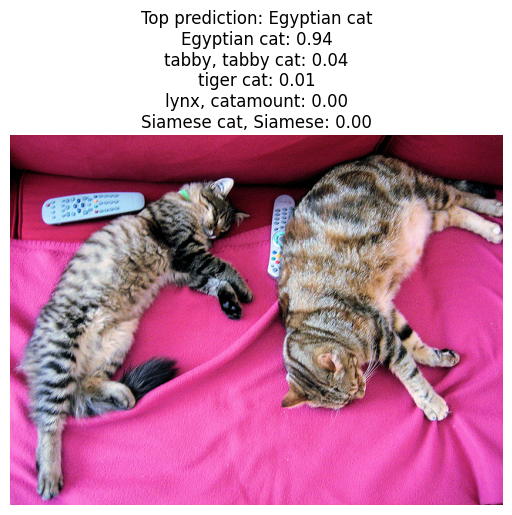

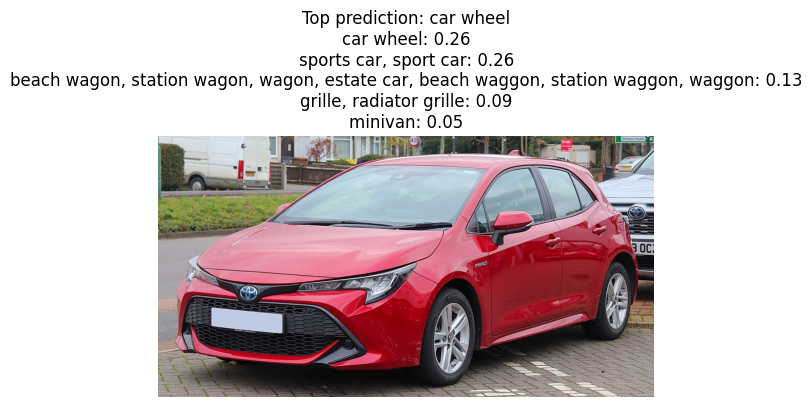

In [26]:
import torch
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Enable GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224").to(device)
model.eval()

# Function to load and preprocess images
def load_images(urls):
    images = [Image.open(requests.get(url, stream=True).raw).convert("RGB") for url in urls]
    inputs = feature_extractor(images=images, return_tensors="pt")
    return images, inputs['pixel_values'].to(device)

# Image URLs (batch of images)
image_urls = [
    "http://images.cocodataset.org/val2017/000000039769.jpg",
    url_car
    #"https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/MountainLion.jpg/640px-MountainLion.jpg"
]

# Load and preprocess
images, pixel_values = load_images(image_urls)

# Run inference
with torch.no_grad():
    outputs = model(pixel_values)
    logits = outputs.logits

# Get top-5 predictions for each image
top_k = 5
probs = torch.nn.functional.softmax(logits, dim=-1)
top_probs, top_labels = torch.topk(probs, top_k)

# Display images with top prediction
for i, img in enumerate(images):
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Top prediction: {model.config.id2label[top_labels[i][0].item()]}\n" +
              "\n".join([f"{model.config.id2label[top_labels[i][j].item()]}: {top_probs[i][j].item():.2f}"
                         for j in range(top_k)]))
    plt.show()


In [30]:
#model.eval()

In [27]:
#-------------------------------- Advanced 2)

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


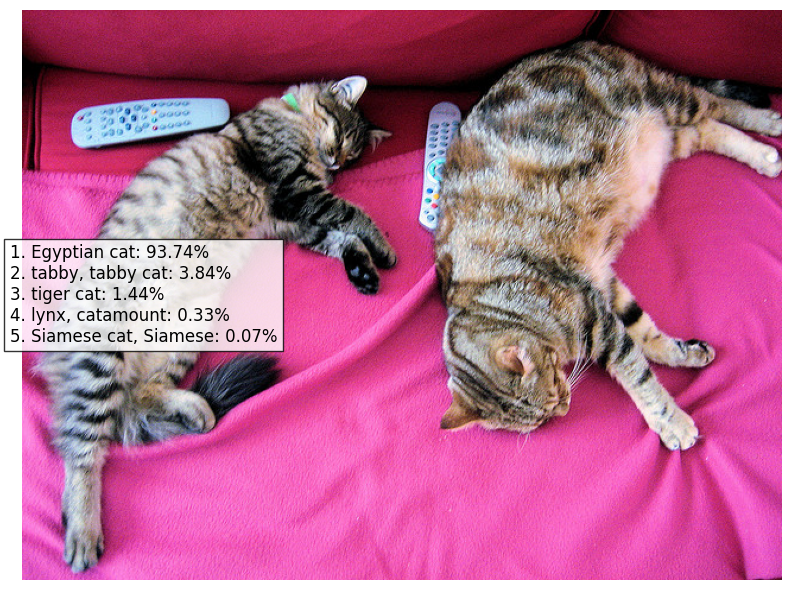

In [31]:
import torch
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Configuration
TOP_K = 5
IMAGE_URL = "http://images.cocodataset.org/val2017/000000039769.jpg"

# Load and preprocess the image
image = Image.open(requests.get(IMAGE_URL, stream=True).raw).convert("RGB")

# Load model and feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
model.eval()

inputs = feature_extractor(images=image, return_tensors="pt")

# Run inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Get top-k predictions
probs = torch.nn.functional.softmax(logits, dim=-1)
top_probs, top_indices = torch.topk(probs, k=TOP_K)

# Convert to readable labels
top_classes = [model.config.id2label[idx.item()] for idx in top_indices[0]]
top_scores = [prob.item() for prob in top_probs[0]]

# Display image with overlay
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')

# Overlay text
text = "\n".join([f"{i+1}. {label}: {score:.2%}" for i, (label, score) in enumerate(zip(top_classes, top_scores))])
plt.gcf().text(0.01, 0.5, text, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
